# Imports

In [6]:
from google.colab import drive

# import zipfile

import pandas

import numpy

import seaborn

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [4]:
%cd 'drive/MyDrive/Colab Notebooks/351/Project'

/content/drive/MyDrive/Colab Notebooks/351/Project


In [7]:
# Add https://drive.google.com/file/d/1GEdxyHTJz_BN_X_0WbThIjurhjtFC8UI/view?usp=share_link (Tenrec.zip) as shortcut to Project folder
# with zipfile.ZipFile('Tenrec.zip', 'r') as zip_ref:
#     zip_ref.extractall('Tenrec')

In [8]:
df = pandas.read_csv('Tenrec/QB-video.csv')
df

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,3502303,1375832,0,0,0,0,1,1,0,0
1,3502303,32277,0,0,0,0,0,1,0,0
2,3502303,1425848,0,0,0,0,0,1,0,0
3,3502303,1480204,0,0,0,0,0,1,0,0
4,3502303,1406570,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2442294,3726406,3325185,0,0,0,0,1,0,1,2
2442295,3502300,3236945,0,0,0,0,1,0,1,4
2442296,3502300,1378970,0,0,0,0,1,0,1,4
2442297,3502300,3314633,0,0,0,0,1,0,1,4


# Data Exploration

In [11]:
for c in df.columns:
  print(c)
  print('unique values:', numpy.unique(df[c]).shape[0])
  print()

user_id
unique values: 34240

item_id
unique values: 130637

click
unique values: 2

follow
unique values: 2

like
unique values: 2

share
unique values: 2

video_category


TypeError: ignored

Fix video_category column

In [14]:
df['video_category'].unique()

array(['1', '0', '\\N', 1, 0], dtype=object)

In [29]:
df['video_category'] = numpy.where(df['video_category'] == '1', 1, df['video_category'])
df['video_category'] = numpy.where(df['video_category'] == '0', 0, df['video_category'])
df['video_category'] = numpy.where(df['video_category'] == '\\N', numpy.nan, df['video_category'])
df['video_category'] = df['video_category'].astype('float')

In [30]:
for c in df.columns:
  unique = numpy.unique(df[c])
  print(c)
  print(unique)
  print(unique.shape[0], 'unique values')
  print()

user_id
[   2138    4306    5488 ... 6283678 6283684 6283692]
34240 unique values

item_id
[      1       4       6 ... 3882842 3882907 3882955]
130637 unique values

click
[0 1]
2 unique values

follow
[0 1]
2 unique values

like
[0 1]
2 unique values

share
[0 1]
2 unique values

video_category
[ 0.  1. nan]
3 unique values

watching_times
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   95   96   98   99
  100  101  102  103  104  105  106  108  109  110  111  112  113  114
  115  116  117  118  119  120  122  123  124  125  126  127  128  129
  130  132  133  

<AxesSubplot:xlabel='age', ylabel='count'>

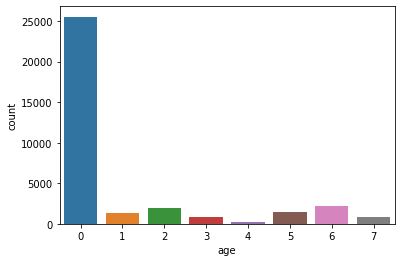

In [62]:
seaborn.countplot(x = df.drop_duplicates(subset = 'user_id')['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

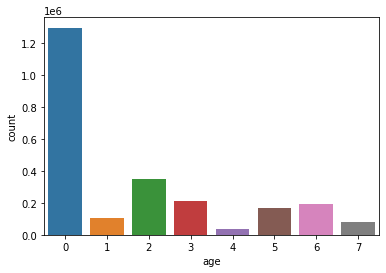

In [63]:
seaborn.countplot(x = df['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

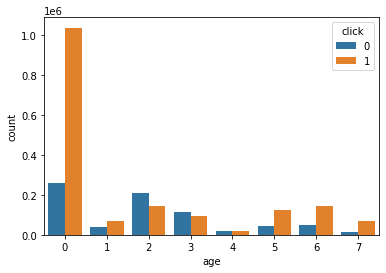

In [42]:
seaborn.countplot(x = df['age'], hue = df['click'])

<AxesSubplot:xlabel='gender', ylabel='count'>

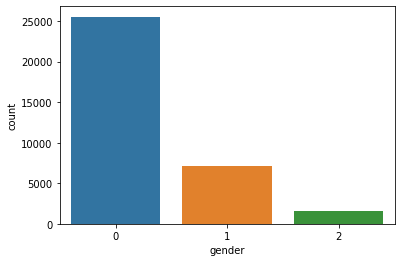

In [58]:
seaborn.countplot(x = df.drop_duplicates(subset = 'user_id')['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

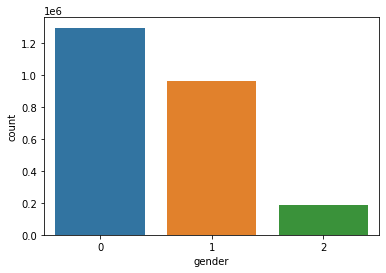

In [64]:
seaborn.countplot(x = df['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

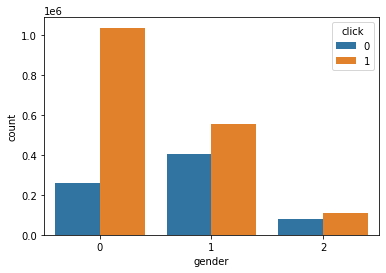

In [46]:
seaborn.countplot(x = df['gender'], hue = df['click'])

<AxesSubplot:>

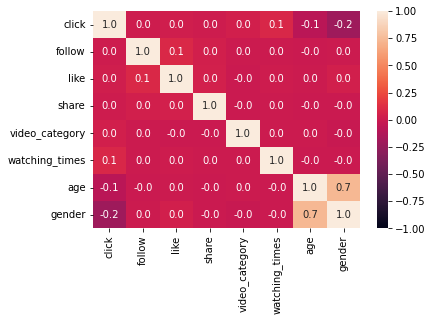

In [70]:
seaborn.heatmap(df[['click', 'follow', 'like', 'share', 'video_category', 'watching_times', 'age', 'gender']].corr(), vmin = -1, vmax = 1, annot = True, fmt = '.1f')